In [1]:
import numpy as np


In [2]:
import cv2
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cd Downloads/

/Users/hasegawatakashikana/Downloads


In [4]:
def des_window():
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1) 

問５１　モルフォロジー勾配

threshold>> 130
[[0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


<function matplotlib.pyplot.show(*args, **kw)>

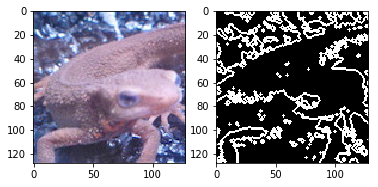

In [31]:
img = cv2.imread("imori.jpg")
H,W,C =img.shape
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = img_gray[np.where(img_gray < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = img_gray[np.where(img_gray >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t


print("threshold>>",max_t)
th = max_t
img_gray[img_gray <th]=0
img_gray[img_gray >=th]=255

out1 = img_gray.copy()
## Morphology - dilate
Dil_time = 1
MF = np.array(((0,1,0),(1,0,1),(0,1,0)),dtype=np.int)
for i in range(Dil_time):
    tmp = np.pad(out1,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])>=255:
                out1[y-1,x-1]=255

out2 = img_gray.copy()
Erode_time = 1

for i in range(Erode_time):
    tmp = np.pad(out2,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])<255*4:
                out2[y-1,x-1]=0

out = np.abs(out1-out2)*255
print(np.abs(out1-out2)*255)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show


In [26]:
np.abs(3-7)*5

20

問５２　トップハット変換

<function matplotlib.pyplot.show(*args, **kw)>

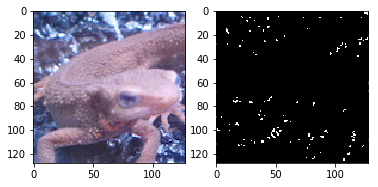

In [51]:
img = cv2.imread("imori.jpg")
H,W,C =img.shape
img_gray =0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
img_gray=img_gray.astype(np.uint8)
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = img_gray[np.where(img_gray < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = img_gray[np.where(img_gray >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

th = max_t
img_gray[img_gray <th]=0
img_gray[img_gray >=th]=255

out = img_gray.copy()
## Morphology - dilate
Erode_time = 3
MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)


for i in range(Erode_time):
    tmp = np.pad(img_gray,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])<255*4:
                out[y-1,x-1]=0
Dil_time = 3

for i in range(Dil_time):
    tmp = np.pad(out,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])>=255:
                out[y-1,x-1]=255

img_gray = img_gray - out
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img_gray,cmap="gray")
plt.show

問５３　ブラックハット変換

<function matplotlib.pyplot.show(*args, **kw)>

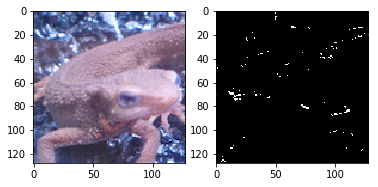

In [57]:
img = cv2.imread("imori.jpg")
H,W,C =img.shape
img_gray =0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
img_gray=img_gray.astype(np.uint8)
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = img_gray[np.where(img_gray < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = img_gray[np.where(img_gray >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

th = max_t
img_gray[img_gray <th]=0
img_gray[img_gray >=th]=255

out = img_gray.copy()
MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)

Dil_time = 3

for i in range(Dil_time):
    tmp = np.pad(img_gray,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])>=255:
                out[y-1,x-1]=255
Erode_time = 3

for i in range(Erode_time):
    tmp = np.pad(out,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])<255*4:
                out[y-1,x-1]=0
out = out - img_gray
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

問５４　テンプレートマッチング　（SSD）

<function matplotlib.pyplot.show(*args, **kw)>

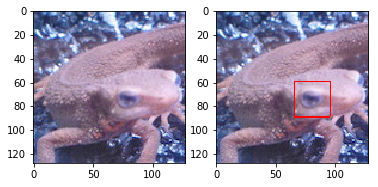

In [78]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
temp = cv2.imread("imori_part.jpg").astype(np.float32)
Ht,Wt,Ct = temp.shape
img2 = img.copy().astype(np.uint8)
mins = 255*H*W
vetex = np.arange(2) 
t = 0
for j in range(H-Ht):
    for i in range(W-Wt):
        s = np.sum((img[j:j+Ht,i:i+Wt]-temp)**2)
        if min(s,mins)==s:
            mins = s
            vertex = (j,i)
            t = s
img[vertex[0]:vertex[0]+Ht,vertex[1]]=(0,0,255)
img[vertex[0]:vertex[0]+Ht,vertex[1]+Wt]=(0,0,255)

img[vertex[0],vertex[1]:vertex[1]+Wt]=(0,0,255)
img[vertex[0]+Ht,vertex[1]:vertex[1]+Wt]=(0,0,255)


img = img.astype(np.uint8)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img2)
plt.subplot(122),plt.imshow(img1)
plt.show

問５５　テンプレートマッチング　(SAD)

<function matplotlib.pyplot.show(*args, **kw)>

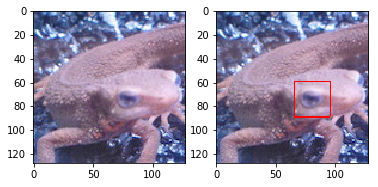

In [79]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
temp = cv2.imread("imori_part.jpg").astype(np.float32)
Ht,Wt,Ct = temp.shape
img2 = img.copy().astype(np.uint8)
mins = 255*H*W
vetex = np.arange(2) 
t = 0
for j in range(H-Ht):
    for i in range(W-Wt):
        s = np.sum(np.abs(img[j:j+Wt,i:i+Wt]-temp))
        if min(s,mins)==s:
            mins = s
            vertex = (j,i)
            t = s
img[vertex[0]:vertex[0]+Ht,vertex[1]]=(0,0,255)
img[vertex[0]:vertex[0]+Ht,vertex[1]+Wt]=(0,0,255)

img[vertex[0],vertex[1]:vertex[1]+Wt]=(0,0,255)
img[vertex[0]+Ht,vertex[1]:vertex[1]+Wt]=(0,0,255)


img = img.astype(np.uint8)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img2)
plt.subplot(122),plt.imshow(img1)
plt.show

問５６　テンプレートマッチング　（NCC)

<function matplotlib.pyplot.show(*args, **kw)>

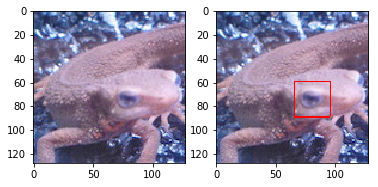

In [81]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
temp = cv2.imread("imori_part.jpg").astype(np.float32)
Ht,Wt,Ct = temp.shape
img2 = img.copy().astype(np.uint8)
maxs = 0.
vetex = np.arange(2) 
sc =np.sqrt(np.sum(temp**2))
for j in range(H-Ht):
    for i in range(W-Wt):
        sa =np.sum(np.abs(img[j:j+Ht,i:i+Wt]*temp))
        sb =np.sqrt(np.sum(img[j:j+Ht,i:i+Wt]**2))
        sc =np.sqrt(np.sum(temp**2))
        s = sa/sb*sc
        if max(s,maxs)==s:
            maxs = s
            vertex = (j,i)
           
img[vertex[0]:vertex[0]+Ht,vertex[1]]=(0,0,255)
img[vertex[0]:vertex[0]+Ht,vertex[1]+Wt]=(0,0,255)

img[vertex[0],vertex[1]:vertex[1]+Wt]=(0,0,255)
img[vertex[0]+Ht,vertex[1]:vertex[1]+Wt]=(0,0,255)


img = img.astype(np.uint8)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img2)
plt.subplot(122),plt.imshow(img1)
plt.show

問５７　テンプレートマッチング　（ZNCC）

<function matplotlib.pyplot.show(*args, **kw)>

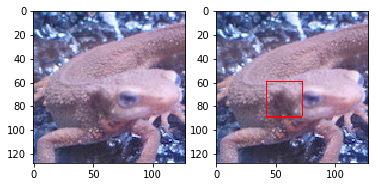

In [118]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
temp = cv2.imread("imori_part.jpg").astype(np.float32)
Ht,Wt,Ct = temp.shape
img2 = img.copy().astype(np.uint8)
maxs = 0.
vetex = np.arange(1)
mi = np.mean(img)
mt = np.mean(temp)
sc =np.sqrt(np.sum(temp**2))
for j in range(H-Ht):
    for i in range(W-Wt):
        sa =np.sum(np.abs((img[j:j+Ht,i:i+Wt]-mi)*(temp-mt)))   #（配列ー数字）の表記も可能！
        sb =np.sqrt(np.sum((img[j:j+Ht, i:i+Wt]-mi)**2))
        sc =np.sqrt(np.sum((temp-mt)**2))
        s = sa/sb*sc
        if max(s,maxs)==s:
            maxs = s
            vertex = (j,i)
           
img[vertex[0]:vertex[0]+Ht,vertex[1]]=(0,0,255)
img[vertex[0]:vertex[0]+Ht,vertex[1]+Wt]=(0,0,255)

img[vertex[0],vertex[1]:vertex[1]+Wt]=(0,0,255)
img[vertex[0]+Ht,vertex[1]:vertex[1]+Wt]=(0,0,255)


img = img.astype(np.uint8)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img2)
plt.subplot(122),plt.imshow(img1)
plt.show

問５８　ラベリング　４近傍

<function matplotlib.pyplot.show(*args, **kw)>

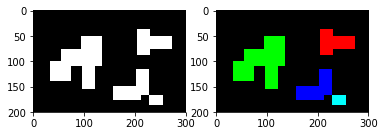

In [125]:
img = cv2.imread("seg.png").astype(np.float32)
H,W,C = img.shape

label = np.zeros((H,W),dtype=np.int)
label[img[...,0]>0]=1

LUT = [0 for _ in range(H*W)]

n = 1

for y in range(H):
    for x in range(W):
        if label[y,x]==0:
            continue
        c3 = label[max(0,y-1),x]
        c5 = label[y,max(0,x-1)]
        if c3<2 and c5<2:
            n +=1
            label[y,x]=n
        else:
            _vs = [c3,c5]
            vs = [a for a in _vs if a>1]
            v = min(vs)
            label[y,x]=v
            
            minv = v
            for _v in vs:
                if LUT[_v]!=0:
                    minv =min(minv,LUT[_v])
            for _v in vs:
                LUT[_v] = minv
count = 1
for l in range(2,n+1):
    flag = True
    for i in range(n+1):
        if LUT[i]==l:
            if flag:
                count +=1
                flag = False
            LUT[i]=count

COLORS = [[0,0,255],[0,255,0],[255,0,0],[255,255,0]]
out = np.zeros((H,W,C),dtype=np.uint8)

for i ,lut in enumerate(LUT[2:]):
    out[label==(i+2)]=COLORS[lut-2]

img = img.astype(np.uint8)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img2)
plt.show

問５９　ラベリング　８近傍

<function matplotlib.pyplot.show(*args, **kw)>

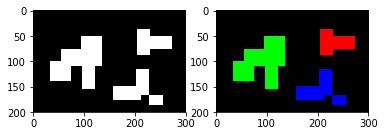

In [126]:
img = cv2.imread("seg.png").astype(np.float32)
H,W,C = img.shape

label = np.zeros((H,W),dtype=np.int)
label[img[...,0]>0]=1

LUT = [0 for _ in range(H*W)]

n = 1

for y in range(H):
    for x in range(W):
        if label[y,x]==0:
            continue
        c2 = label[max(y-1,0),min(x+1,W-1)]
        c3 = label[max(0,y-1),x]
        c4 = label[max(y-1,0),max(x-1,0)]
        c5 = label[y,max(0,x-1)]
        if c2<2 and c3<2 and c4<2 and c5<2:
            n +=1
            label[y,x]=n
        else:
            _vs = [c2,c3,c4,c5]
            vs = [a for a in _vs if a>1]
            v = min(vs)
            label[y,x]=v
            
            minv = v
            for _v in vs:
                if LUT[_v]!=0:
                    minv =min(minv,LUT[_v])
            for _v in vs:
                LUT[_v] = minv
count = 1
for l in range(2,n+1):
    flag = True
    for i in range(n+1):
        if LUT[i]==l:
            if flag:
                count +=1
                flag = False
            LUT[i]=count

COLORS = [[0,0,255],[0,255,0],[255,0,0],[255,255,0]]
out = np.zeros((H,W,C),dtype=np.uint8)

for i ,lut in enumerate(LUT[2:]):
    out[label==(i+2)]=COLORS[lut-2]

img = img.astype(np.uint8)
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img2)
plt.show

問６０　アルファブレンド

<function matplotlib.pyplot.show(*args, **kw)>

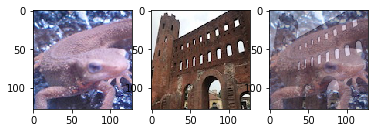

In [129]:
img1 = cv2.imread("imori.jpg").astype(np.float32)
img2 = cv2.imread("thorino-2.jpg").astype(np.float32)
alpha = 0.6
out = np.zeros_like(img1)
out = img1*alpha + img2*(1-alpha)
img1 = img1.astype(np.uint8)
img2 = img2.astype(np.uint8)
out = out.astype(np.uint8)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.subplot(131),plt.imshow(img1)
plt.subplot(132),plt.imshow(img2)
plt.subplot(133),plt.imshow(out)
plt.show

問６１　４ー連結数

<function matplotlib.pyplot.show(*args, **kw)>

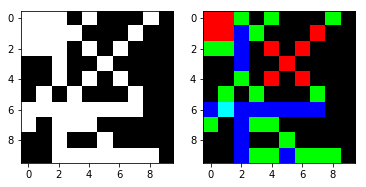

In [140]:
img1 = cv2.imread("renketsu.png")
H,W,C = img1.shape
img = img1[...,0].copy()
img = img/255
out = np.zeros_like(img1)
for y in range(H):
    for x in range(W):
        if img[y,x]==0:
            continue
        x0 = img[y,x]
        x1 = img[y,min(x+1,W-1)]
        x2 = img[max(y-1,0),min(x+1,W-1)]
        x3 = img[max(y-1,0),x]
        x4 = img[max(y-1,0),max(x-1,0)]
        x5 = img[y,max(x-1,0)]
        x6 = img[min(y+1,H-1),max(x-1,0)]
        x7 = img[min(y+1,H-1),x]
        x8 = img[min(y+1,H-1),min(x+1,W-1)]
        s = (x1-x1*x2*x3)+(x3-x3*x4*x5)+(x5-x5*x6*x7)+(x7-x7*x8*x1)
        if s == 0:
            out[y,x] =[0,0,255]
        elif s == 1:
            out[y,x] =[0,255,0]
        elif s == 2:
            out[y,x] =[255,0,0]
        elif s == 3:
            out[y,x] =[255,255,0]
        elif s == 4:
            out[y,x] =[255,0,255]
            
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB) 
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(out)
plt.show
                

問６２　８ー連結数

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

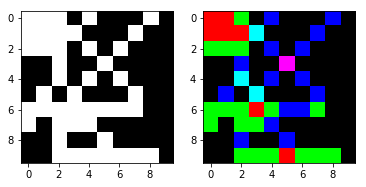

In [186]:
img1 = cv2.imread("renketsu.png").astype(np.float32)
H, W, C = img1.shape
img2 = np.zeros((H, W), dtype=np.int)
img2[img1[..., 0]>0] = 1

img = 1 - img2

out = np.zeros((H, W, 3), dtype=np.uint8)
for y in range(H):
    for x in range(W):
        if img2[y, x] < 1:
            continue

        c = 0
        c += (img[y,min(x+1,W-1)] - img[y,min(x+1,W-1)] * img[max(y-1,0),min(x+1,W-1)] * img[max(y-1,0),x])
        c += (img[max(y-1,0),x] - img[max(y-1,0),x] * img[max(y-1,0),max(x-1,0)] * img[y,max(x-1,0)])
        c += (img[y,max(x-1,0)] - img[y,max(x-1,0)] * img[min(y+1,H-1),max(x-1,0)] * img[min(y+1,H-1),x])
        c += (img[min(y+1,H-1),x] - img[min(y+1,H-1),x] * img[min(y+1,H-1),min(x+1,W-1)] * img[y,min(x+1,W-1)])
        
        if c == 0:
            out[y,x] = [0, 0, 255]
        elif c == 1:
            out[y,x] = [0, 255, 0]
        elif c == 2:
            out[y,x] = [255, 0, 0]
        elif c == 3:
            out[y,x] = [255, 255, 0]
        elif c == 4:
            out[y,x] = [255, 0, 255]
out = out.astype(np.uint8)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB) 
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(out)
plt.show
                

問６３　細線化処理

<function matplotlib.pyplot.show(*args, **kw)>

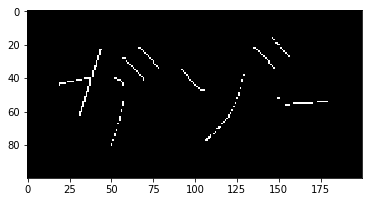

In [4]:
img = cv2.imread("gazo.png").astype(np.float32)
H,W,C = img.shape
out = np.zeros((H,W),dtype=np.float32)
out[img[...,0]>0]=1
count = 1

while count>0:
    count = 0
    tmp = out.copy()
    for y in range(H):
        for x in range(W):
            x0 = tmp[y,x]
            x1 = tmp[y,min(x+1,W-1)]
            x2 = tmp[max(y-1,0),min(x+1,W-1)]
            x3 = tmp[max(y-1,0),x]
            x4 = tmp[max(y-1,0),max(x-1,0)]
            x5 = tmp[y,max(x-1,0)]
            x6 = tmp[min(y+1,H-1),max(x-1,0)]
            x7 = tmp[min(y+1,H-1),x]
            x8 = tmp[min(y+1,H-1),min(x+1,W-1)]
            s = (x1-x1*x2*x3)+(x3-x3*x4*x5)+(x5-x5*x6*x7)+(x7-x7*x8*x1)
            if out[y,x]==0:
                continue
            judge = 0
            if x1+x3+x5+x7 <4:judge+=1
            if s ==1:judge +=1
            if x1+x2+x3+x4+x5+x6+x7+x8 >=3:judge +=1
            if judge==3:
                out[y,x]=0
                count +=1
out = out.astype(np.uint8)*255
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.subplot(121),plt.imshow(img1)
# plt.subplot(122),
plt.imshow(out,cmap="gray")
plt.show                

問６５　Zhang-Suenの細線化　（問６４は修正中なのでとばす）

<function matplotlib.pyplot.show(*args, **kw)>

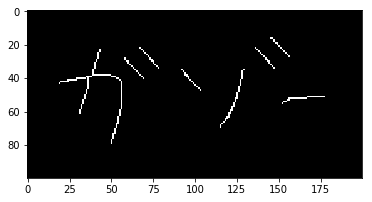

In [25]:
img = cv2.imread("gazo.png")
H,W,C = img.shape
out = np.zeros((H,W),dtype=np.float32)
out[img[...,0]>0]=1
out = 1-out

while True:
    s1=[]
    s2=[]
    
    #ステップ１
    for y in range(1,H-1): #なんで範囲ちっちゃい？
        for x in range(1,W-1):
            
            if out[y,x]>0:
                continue
            f1 = 0
            if (out[y-1, x+1] - out[y-1, x]) == 1:
                f1 += 1
            if (out[y, x+1] - out[y-1, x+1]) == 1:
                f1 += 1
            if (out[y+1, x+1] - out[y, x+1]) == 1:
                f1 += 1
            if (out[y+1, x] - out[y+1,x+1]) == 1:
                f1 += 1
            if (out[y+1, x-1] - out[y+1, x]) == 1:
                f1 += 1
            if (out[y, x-1] - out[y+1, x-1]) == 1:
                f1 += 1
            if (out[y-1, x-1] - out[y, x-1]) == 1:
                f1 += 1
            if (out[y-1, x] - out[y-1, x-1]) == 1:
                f1 += 1
            if f1 != 1:
                continue
                
            f2 = np.sum(out[y-1:y+2,x-1:x+2])
            if f2<2 or f2>6:
                continue
            
            if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                continue

            # condition 5
            if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:
                continue
            
            s1.append([y,x])
    for v in s1:
        out[v[0],v[1]]=1

    #ステップ２
    for y in range(1,H-1): #なんで範囲ちっちゃい？
        for x in range(1,W-1):
            
            if out[y,x]>0:
                continue
            f1 = 0
            if(out[y-1,x+1]-out[y-1,x]==1):
                f1 +=1
            if(out[y,x+1]-out[y-1,x+1]==1):
                f1 +=1
            if(out[y+1,x+1]-out[y,x+1]==1):
                f1 +=1
            if(out[y+1,x]-out[y+1,x+1]==1):
                f1 +=1
            if(out[y+1,x-1]-out[y+1,x]==1):
                f1 +=1
            if(out[y,x-1]-out[y+1,x-1]==1):
                f1 +=1
            if(out[y-1,x-1]-out[y,x-1]==1):
                f1 +=1
            if(out[y-1,x]-out[y-1,x-1]==1):
                f1 +=1
            if f1 != 0:
                continue
                
            f2 = np.sum(out[y-1:y+2,x-1:x+2])
            if f2<2 or f2>6:
                continue
            
            if out[y-1,x]+out[y,x+1]+out[y,x-1]<1:
                continue
            if out[y,x-1]+out[y+1,x]+out[y+1,x]<1:
                continue
            
            s2.append([y,x])
    for v in s2:
        out[v[0],v[1]]=1
    if len(s1)<1 and len(s2)<1:
        break
            
out = ((1-out)*255).astype(np.uint8)
plt.imshow(out,cmap="gray")
plt.show   
   

問６６　HOG (Step.1) 勾配強度・勾配角度

１.画像をグレースケール化し、x,y方向の輝度勾配を求める

２.勾配強度と勾配角度を求める

３.勾配角度を [0, 180]で9分割した値に量子化する。つまり、[0,20]には0、[20, 40]には1というインデックスを求める。

<function matplotlib.pyplot.show(*args, **kw)>

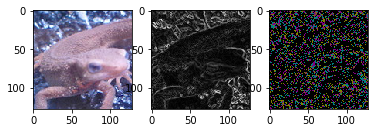

In [27]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gray = np.pad(gray,(1,1),"edge")

#輝度勾配gx,gyを求める
gx = gray[1:H+1,2:]-gray[1:H+1,:W]
gy = gray[2:,1:W+1]-gray[:H,1:W+1]
gx[gx==0]=0.0000001

#勾配強度magと勾配角度graを求める
mag = np.sqrt(gx**2+gy**2)
gra = np.arctan(gy/gx)
#graの値が正になるように調節
gra[gra<0]=np.pi+gra[gra<0]
#graを9分割した時の値を入れるリスト作成
gra_n = np.zeros_like((gra),dtype=np.int)
d = np.pi/9 #最大値は180ではなく3.14で区切る
for i in range(9):
    gra_n[np.where((gra>=i*d)&(gra<=(i+1)*d))]=i

#勾配強度をグラフ表示のため255で正規化
mag = (mag/np.max(mag)*255).astype(np.uint8)

#勾配角度をグラフ表示のため色付け
out = np.zeros((H,W,C),dtype=np.uint8)
C = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
     [127, 127, 0], [127, 0, 127], [0, 127, 127]]
for i in range(9):
    out[gra_n==i]=C[i]

out = out.astype(np.uint8)*255
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(mag,cmap="gray")
plt.subplot(133),plt.imshow(out)
plt.show                

問６７　HOG (Step.2) 勾配ヒストグラム

４.画像をN x Nの領域に分割し(この領域をセルという)、セル内で3で求めたインデックスのヒストグラムを作成する。ただし、当表示は1でなく勾配角度を求める

<function matplotlib.pyplot.show(*args, **kw)>

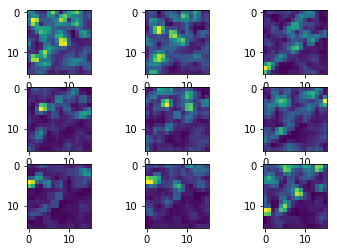

In [46]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gray = np.pad(gray,(1,1),"edge")

#輝度勾配gx,gyを求める
gx = gray[1:H+1,2:]-gray[1:H+1,:W]
gy = gray[2:,1:W+1]-gray[:H,1:W+1]
gx[gx==0]=0.0000001

#勾配強度magと勾配角度graを求める
mag = np.sqrt(gx**2+gy**2)
gra = np.arctan(gy/gx)
#graの値が正になるように調節
gra[gra<0]=np.pi+gra[gra<0]
#graを9分割した時の値を入れるリスト作成
gra_n = np.zeros_like((gra),dtype=np.int)
d = np.pi/9 #最大値は180ではなく3.14で区切る
for i in range(9):
    gra_n[np.where((gra>=i*d)&(gra<=(i+1)*d))]=i

N = 8
HH = H//N
HW = W//N
Hist = np.zeros((HH, HW, 9), dtype=np.float32)
for y in range(HH):
    for x in range(HW):
        for j in range(N):
            for i in range(N):
                Hist[y,x,gra_n[y*N+j,x*N+i]] += mag[y*N+j,x*N+i]

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Hist[...,i])
plt.show

問６８　HOG (Step.3) ヒストグラム正規化

C x Cのセルを１つとして(これをブロックという)、ブロック内のセルのヒストグラムを次式で正規化する。これを1セルずつずらしながら行うので、一つのセルが何回も正規化される。

h(t) = h(t) / sqrt(Sum h(t) + epsilon)
通常は　epsilon=1

<function matplotlib.pyplot.show(*args, **kw)>

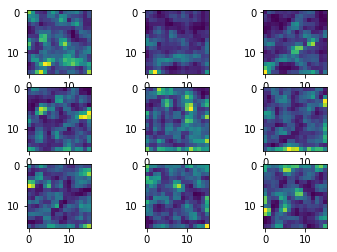

In [52]:
C = 3
eps = 1
for y in range(HH):
    for x in range(HW):
        #for i in range(9):
        Hist[y,x]=Hist[y,x]/(np.sqrt(np.sum(Hist[max(y-1,0):min(HH,y+2),max(x-1,0):min(HW,x+2)]**2)+eps)) #なんで自乗した？
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Hist[...,i])
plt.show     

問６９　HOG (Step.4) 特徴量の描画

<function matplotlib.pyplot.show(*args, **kw)>

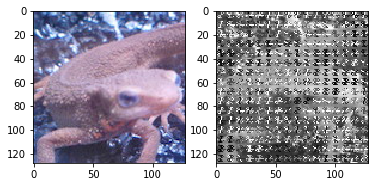

In [57]:
out = gray[1:H+1,1:W+1].copy().astype(np.uint8)
for y in range(HH):
    for x in range(HW):
        cx = x*N + N//2
        cy = y*N + N//2
        x1 = cx + N//2 -1
        y1 = cy
        x2 = cx - N//2 +1
        y2 = cy
        
        h = Hist[y,x]/np.sum(Hist[y,x])
        h /= max(h)
        
        for c in range(9):
            angle = (20*c +10)/180.*np.pi
            rx =int(np.sin(angle)*(x1-cx)+cx)
            ry =int(np.cos(angle)*(x1-cx)+cy)
            lx =int(np.sin(angle)*(x2-cx)+cx)
            ly =int(np.cos(angle)*(x2-cx)+cy)
            
            c = int(255.*h[c])
            cv2.line(out,(lx,ly),(rx,ry),(c,c,c),thickness=1)


img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show    

問７０　カラートラッキング

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


<function matplotlib.pyplot.show(*args, **kw)>

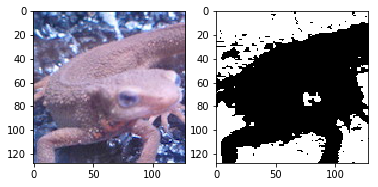

In [74]:
img1= cv2.imread("imori.jpg")
#imgの値を[0,1]にする
img = img1.copy()/255
#imgの大きさの要素が全て0の配列を作成する
out = np.zeros_like(img)
#imgのそれぞれのR,G,Bの値のなかでの最大、最小および最小値のインデックスを求める
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

mask = np.zeros_like(H)
mask[np.where((H>180)&(H<260))]=255

out = mask.astype(np.uint8)

img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show    

問７１　マスキング

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less


<function matplotlib.pyplot.show(*args, **kw)>

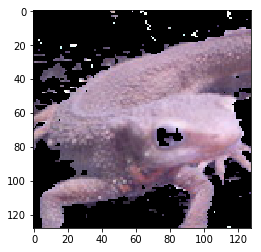

In [95]:
img1= cv2.imread("imori.jpg")
#imgの値を[0,1]にする
img = img1.copy()/255
#imgの大きさの要素が全て0の配列を作成する
out = np.zeros_like(img)
#imgのそれぞれのR,G,Bの値のなかでの最大、最小および最小値のインデックスを求める
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

mask = np.zeros_like(H)
mask[np.where((H>180)&(H<260))]=255

out = mask.astype(np.uint8)

img1= cv2.imread("imori.jpg")
#imgの値を[0,1]にする
img = img1.copy()/255
#imgの大きさの要素が全て0の配列を作成する
out = np.zeros_like(img)
#imgのそれぞれのR,G,Bの値のなかでの最大、最小および最小値のインデックスを求める
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

mask = np.zeros_like(H)
mask[np.where((H>180)&(H<260))]=1

mask =1-mask

out1 = np.zeros_like(img)
out1 *=255
out1[...,1]=mask
out1[...,2]=mask
out1[...,0]=mask
out1 *= img*255

out1 = out1.astype(np.uint8)
out1 = cv2.cvtColor(out1,cv2.COLOR_BGR2RGB)
plt.imshow(out1,cmap="gray")
plt.show    

問７２　マスキング(カラートラッキング＋モルフォロジー)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


<function matplotlib.pyplot.show(*args, **kw)>

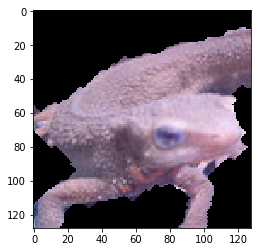

In [110]:
img1= cv2.imread("imori.jpg")
#imgの値を[0,1]にする
img = img1.copy()/255
#imgの大きさの要素が全て0の配列を作成する
out = np.zeros_like(img)
#imgのそれぞれのR,G,Bの値のなかでの最大、最小および最小値のインデックスを求める
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

mask = np.zeros_like(H)
mask[np.where((H>180)&(H<260))]=255

h,w,_ = img.shape

Dil_time = 5
out=mask.copy()
MF = np.array(((0,1,0),(1,0,1),(0,1,0)),dtype=np.int)
for i in range(Dil_time):
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                out[y-1, x-1] = 255

# Morphology - erode
Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                out[y-1, x-1] = 0


for i in range(Erode_time):
    tmp = np.pad(out,(1,1),"edge")
    for y in range(1,h+1):
        for x in range(1,w+1):
#             if tmp[y,x]!=255:
#                 continue
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])<255*4:
                out[y-1,x-1]=0

MF = np.array(((0,1,0),(1,0,1),(0,1,0)),dtype=np.int)
for i in range(Dil_time):
    tmp = np.pad(out,(1,1),"edge")
    for y in range(1,h+1):
        for x in range(1,w+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])>=255:
                out[y-1,x-1]=255
out = ((255-out)/255).astype(np.uint8)
mask = np.zeros((h,w,_),dtype=np.uint8)

out1 = np.zeros_like(img)
out1 *=255
out1[...,1]=out
out1[...,2]=out
out1[...,0]=out
out1 *= img*255
out1[out1>255]=255
out1 = out1.astype(np.uint8)
out1 = cv2.cvtColor(out1,cv2.COLOR_BGR2RGB)
plt.imshow(out1)
plt.show    

問７３　縮小と拡大

In [12]:
def resize(img,h,w):
    _h,_w = img.shape
    ah = 1.*h/_h                                     #y方向に何倍するか
    aw = 1.*w/_w                                     #x方向に何倍するか
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(h), (h, 1))
    y = (y / ah)
    x = (x / aw)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    # print(ix)
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _h-2)

    dx = x-ix
    dy = y-iy
#     #３次元に拡張したあとさらにrepeatすることでRGBの3要素分の値を生成している
#     dx = np.expand_dims(dx, axis=-1)
#     dy = np.expand_dims(dy, axis =-1)

    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255]=255
    return out

<function matplotlib.pyplot.show(*args, **kw)>

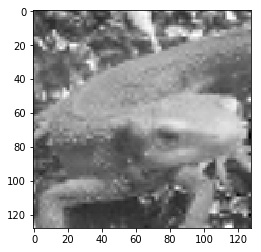

In [144]:
img= cv2.imread("imori.jpg")
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = bi_liner(0.5,gray) 
out = bi_liner(2.0,out)

plt.imshow(out,cmap ="gray" )
plt.show    

問７４　ピラミッド差分による高周波成分の抽出

<function matplotlib.pyplot.show(*args, **kw)>

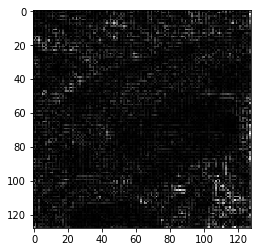

In [146]:
img= cv2.imread("imori.jpg")
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = gray.copy()
out = bi_liner(0.5,out) 
out = bi_liner(2.0,out)
out = np.abs(out-gray)
out = out/np.max(out)*255
plt.imshow(out,cmap ="gray" )
plt.show    

問７５　ガウシアンピラミッド

In [180]:
def bi_liner(a,img):
    H,W,C = img.shape

    a = 1.5
    aH = int(a*H)
    aW = int(a*W)
    y = np.arange(aH).repeat(aW).reshape(aW, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    y = (y / a)
    x = (x / a)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    # print(ix)
    ix = np.minimum(ix, W-2)
    iy = np.minimum(iy, H-2)

    dx = x-ix
    dy = y-iy
    #３次元に拡張したあとさらにrepeatすることでRGBの3要素分の値を生成している
    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis =-1),3,axis = -1)


    out = (1-dx)*(1-dy)*img[iy,ix] + dx*(1-dy)*img[iy,ix+1] +(1-dx)*dy*img[iy+1,ix] +dx*dy*img[iy+1,ix+1]
    out = out.astype(np.uint8)
    return out

<function matplotlib.pyplot.show(*args, **kw)>

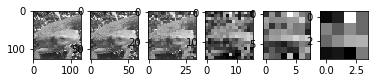

In [221]:
img= cv2.imread("imori.jpg")
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
pyramid = [gray]
for i in range(1,6):
    a = 2.**i
    p = bi_liner_gray(1/a,gray)
    pyramid.append(p)

for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(pyramid[i],cmap="gray")

plt.show

問７６　 顕著性マップ

１.ガウシアンピラミッドをそれぞれ、128, 64, 32, ...というサイズになっているが、はじめにそれらを128にリサイズせよ。リサイズはbi-linear補間を用いよ。

２.作成したピラミッド（それぞれ0, 1, 2, 3, 4, 5と番号をふる）の２つを選び差分を求める。

３.2で求めた差分を全て足し合わせ、[0, 255]に正規化せよ。

(128, 128)


<function matplotlib.pyplot.show(*args, **kw)>

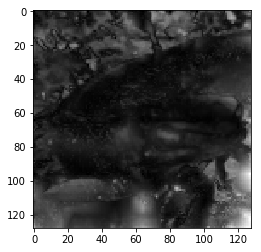

In [193]:
H,W=gray.shape
for i in range(1,6):
    a = 2.**(i)

    pyramid[i] = bi_liner_gray(a,pyramid[i])
print(pyramid[3].shape)
out = np.zeros((H,W),dtype=np.float32)
out +=np.abs(pyramid[0]-pyramid[1])
out +=np.abs(pyramid[0]-pyramid[3])
out +=np.abs(pyramid[0]-pyramid[5])
out +=np.abs(pyramid[1]-pyramid[4])
out +=np.abs(pyramid[2]-pyramid[3])
out +=np.abs(pyramid[3]-pyramid[5])
out = (out/np.max(out)*255).astype(np.uint8)
plt.imshow(out,cmap ="gray" )
plt.show    

問７７　ガボールフィルタ

In [265]:
# K_size = 111.
# s = 10.
# g = 1.2
# l = 10.
# p = 0.
# A = 0.
# d = K//2

def gabor_make(K_size,s,g,l,p,A):
    d = K_size//2
    gabor = np.zeros((K_size,K_size),dtype=np.float32)

    for y in range(K_size):
        for x in range(K_size):
            px = x-d
            py = y-d
            A_ = A/180. *np.pi
            dx = np.cos(A_)*px+np.sin(A_)*py
            dy = -np.sin(A_)*px + np.cos(A_)*py
            gabor[x,y]=np.exp(-(dx**2+(g*dy)**2)/(2*s**2))*np.cos(2*np.pi*dx/l+p) #なんで[y,x]じゃないん？
    gabor /= np.sum(np.abs(gabor))
    return gabor

<function matplotlib.pyplot.show(*args, **kw)>

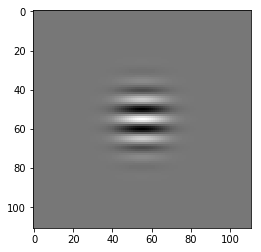

In [254]:
gabor = gabor_make(111,10.,1.2,10.,0.,0.)
#可視化のための処置
gabor = gabor - np.min(gabor)
gabor = (gabor/np.max(gabor)*255).astype(np.uint8)

plt.imshow(gabor,cmap ="gray" )
plt.show

問７８　ガボールフィルタの回転

<function matplotlib.pyplot.show(*args, **kw)>

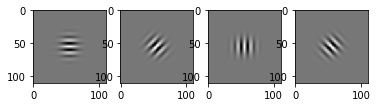

In [299]:
pyramid = []
for i in range(4):
    A = 45.*i
    p = gabor_make(111,10.,1.2,10.,0.,A)
    p = p - np.min(p)
    p = (p/np.max(p)*255).astype(np.uint8)
    pyramid.append(p)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(pyramid[i],cmap="gray")

plt.show

問７９　ガボールフィルタによるエッジ抽出

パラメータはK=11, s=1.5, g=1.2, l=3, p=0とする。

<function matplotlib.pyplot.show(*args, **kw)>

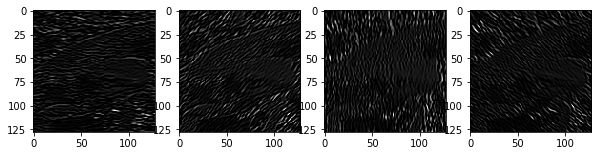

In [308]:
K=11
s=1.5
g=1.2
l=3.
p=0.
img = cv2.imread("imori.jpg")
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
H,W = gray.shape
pyramid = []
for i in range(4):
    A = 45.*i
    q = gabor_make(K,s,g,l,p,A)
    pyramid.append(q)
out = np.zeros((H,W),dtype=np.float32)
outo=[]
gray = np.pad(gray,(K//2,K//2),"edge")

for i in range(4):
    out = np.zeros((H,W),dtype=np.float32)
    for y in range(H):
        for x in range(W):

            out[y,x]=np.sum(gray[y:y+K,x:x+K]*pyramid[i])
    out[out<0]=0
    out[out>255]=255
    outo.append(out)
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(outo[i],cmap="gray")

plt.show

問８０　ガボールフィルタによる特徴抽出

<function matplotlib.pyplot.show(*args, **kw)>

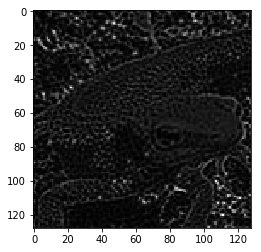

In [311]:
out = outo[0]+outo[1]+outo[2]+outo[3]
plt.imshow(out,cmap="gray")
plt.show

問８１　Hessianのコーナー検出

(192, 256, 3)


<function matplotlib.pyplot.show(*args, **kw)>

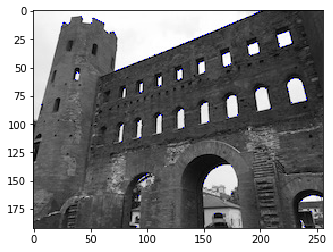

In [424]:
img = cv2.imread("thorino.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gray = gray.astype(np.uint8)
Sobel_y= [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]]
Sobel_x = [[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]]

tmp = np.pad(gray,(1,1),"edge")

Ix = np.zeros_like(gray,dtype=np.float32)
Iy = np.zeros_like(gray,dtype=np.float32)

for y in range(H):
    for x in range(W):
        Ix[y,x] = np.mean(tmp[y:y+3,x:x+3]*Sobel_x)
        Iy[y,x] = np.mean(tmp[y:y+3,x:x+3]*Sobel_y)

tmp = np.pad(Ix,(1,1),"edge")

Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy
out = np.array((gray,gray,gray))
# print(gray.shape)
# print(out.shape)
out = np.transpose(out,(1,2,0))
print(out.shape)
Hes = np.zeros((H,W))
for y in range(H):
    for x in range(W):
        Hes[y,x]=Ix2[y,x]*Iy2[y,x]-IxIy[y,x]**2

for y in range(H):
    for x in range(W):
        if Hes[y,x]==np.max(Hes[max(y-1,0):min(y+2,H),max(x-1,0):min(x+2,W)]) and Hes[y,x] >np.max(Hes)*0.1:
            out[y,x]=[0,0,255]

out = out.astype(np.uint8)

plt.imshow(out,cmap="gray")
plt.show

問８２　Harrisのコーナー検出 (Step.1) Sobel + Gauusian

1.画像をグレースケール化。

2.Sobelフィルタにより、ヘシアン行列を求める。

3.Ix^2, Iy^2, IxIyにそれぞれガウシアンフィルターをかける。

(194, 258)


<function matplotlib.pyplot.show(*args, **kw)>

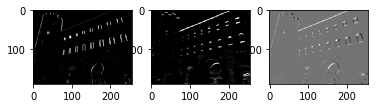

In [476]:
img = cv2.imread("thorino.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Harris

## Sobel
sobely = np.array(((1, 2, 1),
                   (0, 0, 0),
                   (-1, -2, -1)), dtype=np.float32)

sobelx = np.array(((1, 0, -1),
                   (2, 0, -2),
                   (1, 0, -1)), dtype=np.float32)


tmp = np.pad(gray,(1,1),"edge")

Ix = np.zeros_like(gray,dtype=np.float32)
Iy = np.zeros_like(gray,dtype=np.float32)

for y in range(H):
    for x in range(W):
        Ix[y,x] = np.sum(tmp[y:y+3,x:x+3]*Sobel_x)
        Iy[y,x] = np.sum(tmp[y:y+3,x:x+3]*Sobel_y)

tmp = np.pad(Ix,(1,1),"edge")

Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy
I = [Ix2,Iy2,Ixy]

K_size = 3 #３かけ３の範囲
sigma = 3.0 #標準偏差
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
#カーネル（フィルタ）作成
K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()
            
I21 = Ix2.copy()
print((np.pad(I[0],(K_size//2,K_size//2),"edge")).shape)
for i in range(3):
    out = np.pad(I[i],(K_size,K_size),"edge")
#     out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
#     out[pad:pad+H, pad:pad+W] = I[i].copy().astype(np.float)

    tmp = out.copy()
    for y in range(H):
        for x in range(W):
            I[i][y,x]=np.sum(K*tmp[y:y+K_size,x:x+K_size])
            
I22 = I[0].copy()

I[0] = I[0][pad:pad+H,pad:pad+W]
I[1] = I[1][pad:pad+H,pad:pad+W]
I[2] = I[2][pad:pad+H,pad:pad+W]
# A = np.array([])
# for i in range(3):
#     A=np.append(A,(I[i][pad:pad+H,pad:pad+W]))
# A = A.astype(np.uint8)
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(I[i],cmap="gray")

plt.show

問８３　Harrisのコーナー検出 (Step.2) コーナー検出

４.各ピクセル毎に、R = det(H) - k (trace(H))^2 を計算する。 (kは実験的に0.04 - 0.16らへんが良いとされる)

５.R >= max(R) * th を満たすピクセルがコーナーとなる。 (thは0.1となることが多い)


(192, 256)


<function matplotlib.pyplot.show(*args, **kw)>

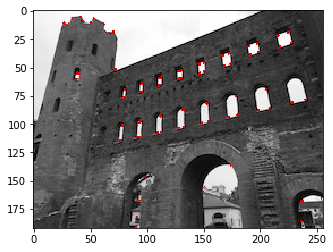

In [480]:
img = cv2.imread("thorino.jpg").astype(np.float32)
H, W, C = img.shape

## Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Harris

## Sobel
sobely = np.array(((1, 2, 1),
                   (0, 0, 0),
                   (-1, -2, -1)), dtype=np.float32)

sobelx = np.array(((1, 0, -1),
                   (2, 0, -2),
                   (1, 0, -1)), dtype=np.float32)

tmp = np.pad(gray, (1, 1), 'edge')

Ix = np.zeros_like(gray, dtype=np.float32)
Iy = np.zeros_like(gray, dtype=np.float32)

for y in range(H):
    for x in range(W):
        Ix[y, x] = np.sum(tmp[y:y+3, x:x+3] * sobelx)
        Iy[y, x] = np.sum(tmp[y:y+3, x:x+3] * sobely)

Ix2 = Ix ** 2
Iy2 = Iy ** 2
Ixy = Ix * Iy

## gaussian
K_size = 3
sigma = 3
Ix2_t = np.pad(Ix2, (K_size // 2, K_size // 2), 'edge')
Iy2_t = np.pad(Iy2, (K_size // 2, K_size // 2), 'edge')
Ixy_t = np.pad(Ixy, (K_size // 2, K_size // 2), 'edge')

K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(K_size):
    for y in range(K_size):
        _x = x - K_size // 2
        _y = y - K_size // 2
        K[y, x] = np.exp( -(_x**2 + _y**2) / (2 * (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()
III = Ix
for y in range(H):
    for x in range(W):
        Ix2[y,x] = np.sum(Ix2_t[y:y+K_size, x:x+K_size] * K)
        Iy2[y,x] = np.sum(Iy2_t[y:y+K_size, x:x+K_size] * K)
        Ixy[y,x] = np.sum(Ixy_t[y:y+K_size, x:x+K_size] * K)
print(Ix2.shape)
out = np.array((gray, gray, gray))
out = np.transpose(out, (1,2,0))

out = np.array((gray,gray,gray))
# print(gray.shape)
# print(out.shape)
out = np.transpose(out,(1,2,0))


k=0.04
M = (Ix2*Iy2-Ixy**2)-k*((Ix2+Iy2)**2)

th = 0.1

out[M>=np.max(M)*th]=[225,0,0]
out = out.astype(np.uint8)
plt.imshow(out)
plt.show

問８４　簡単な画像認識 (Step.1) 減色化 + ヒストグラム

１.画像(train_***.jpg)を減色処理(Q.6. RGBをそれぞれ4階調)する。

２.減色処理した画像のヒストグラムを作成する。ここでのヒストグラムはRGBがそれぞれ4値をとるが、それらを区別するため、B=[1,4], G=[5,8], R=[9,12]のbin=12となる。それぞれの画像に対応するヒストグラムも保存する必要があるので注意。 　つまり、database = np.zeros((10(学習データ数), 13(RGB + class), dtype=np.int)　に学習データのヒストグラムを格納する必要がある。

３.２のヒストグラムをデータベースとする。

[[  183 12248  2986   967   486 11579  3390   929   391 10081  4845  1067
      0]
 [ 3628  7350  4416   990  1736  8444  4652  1552   847  9096  4974  1467
      0]
 [ 1644  6539  5812  2389  1713  8501  5235   935  1555  5272  7148  2409
      0]
 [  740 10162  5454    28  1431  7921  7002    30  1489  7822  7024    49
      0]
 [  920  4195  8582  2687   671  5695  7944  2074   507  3958  6401  5518
      0]
 [ 2806  6422  2541  4615  1638  7316  3027  4403   248  8647  1576  5913
      1]
 [ 5561  7862  1608  1353  4641  6767  3556  1420  4678  7971  2167  1568
      1]
 [ 4834  7579  3261   710  4480  6371  3047  2486  4315  7160  3380  1529
      1]
 [ 7876  6161  1996   351  7430  3961  4259   734  7355  4988  3317   724
      1]
 [ 5618  6638  3882   246  5042  4181  6278   883  5213  4946  5550   675
      1]]


<function matplotlib.pyplot.show(*args, **kw)>

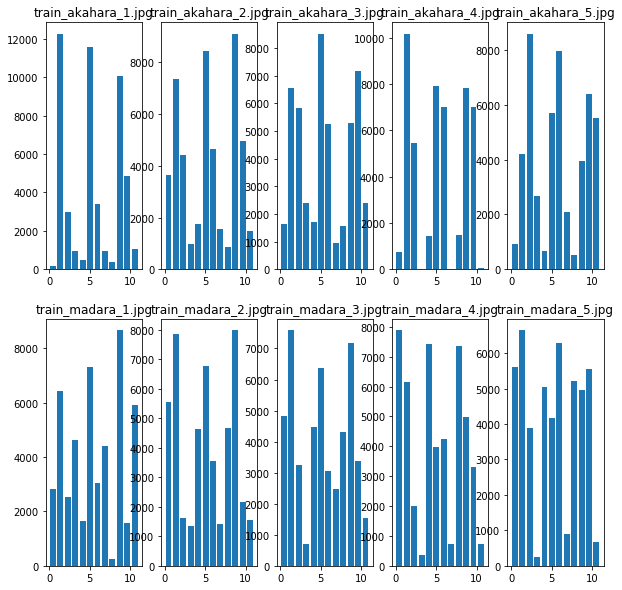

In [11]:
from glob import glob

## Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

## Database
train = glob("train_*")
train.sort()
pdb=[]
db = np.zeros((len(train),13),dtype=np.int32)
plt.figure(figsize=(10,10))
for i ,path in enumerate(train):
    img = dic_color(cv2.imread(path))
    #ヒストグラム作成
    for j in range(4):
        db[i,j]=len(np.where(img[...,0]==(64*j+32))[0]) #[0]をつけることで２次元配列じゃなくて単純に個数のみをとってきてるb
        db[i,j+4]=len(np.where(img[...,1]==(64*j+32))[0])
        db[i,j+8]=len(np.where(img[...,2]==(64*j+32))[0])
    
    if "akahara" in path:
        cls = 0
    elif "madara" in path:
        cls = 1
    db[i,-1]=cls
    pdb.append(path)
    
    img_h = img.copy()//64
    img_h[...,1]+=4
    img_h[...,2]+=8
    plt.subplot(2,5,i+1)
    plt.hist(img_h.ravel(),bins=12,rwidth=0.8)
    plt.title(path)
print(db) 
plt.show


問８５　簡単な画像認識 (Step.2) クラス判別

４.認識したい画像(test_@@@.jpg)とヒストグラムの差を計算して、特徴量とする。

５.ヒストグラムの差の合計で、最小となった画像が予測となるクラスである。つまり、色が近い画像と同じクラスになると考えられる。

In [500]:
test = glob("test_*")
test.sort()

plt.figure(figsize=(10,10))
for path in test:
    img = dic_color(cv2.imread(path))
    #ヒストグラム作成
    hist = np.zeros((12),dtype=np.int32)
    for j in range(4):
        hist[j]=len(np.where(img[...,0]==(64*j+32))[0]) #[0]をつけることで２次元配列じゃなくて単純に個数のみをとってきてるb
        hist[j+4]=len(np.where(img[...,1]==(64*j+32))[0])
        hist[j+8]=len(np.where(img[...,2]==(64*j+32))[0])
    #比較
    difs = np.abs(db[:,:12]-hist)
    difs = np.sum(difs,axis=1)
    pred_i = np.argmin(difs)
    pred=db[pred_i,-1]
    
    if pred == 0:
        pl="akahara"
    elif pred ==1:
        pl ="madara"
        
    print(str(path)+"is similar >>"+str(pdb[pred_i])+"Pred >>"+str(pl))

test_akahara_1.jpgis similar >>train_akahara_3.jpgPred >>akahara
test_akahara_2.jpgis similar >>train_akahara_1.jpgPred >>akahara
test_madara_1.jpgis similar >>train_madara_2.jpgPred >>madara
test_madara_2.jpgis similar >>train_akahara_2.jpgPred >>akahara


<Figure size 720x720 with 0 Axes>

問８６　簡単な画像認識（Step.4）評価

In [503]:
test = glob("test_*")
test.sort()
success_num = 0
plt.figure(figsize=(10,10))
for path in test:
    img = dic_color(cv2.imread(path))
    #ヒストグラム作成
    hist = np.zeros((12),dtype=np.int32)
    for j in range(4):
        hist[j]=len(np.where(img[...,0]==(64*j+32))[0]) #[0]をつけることで２次元配列じゃなくて単純に個数のみをとってきてるb
        hist[j+4]=len(np.where(img[...,1]==(64*j+32))[0])
        hist[j+8]=len(np.where(img[...,2]==(64*j+32))[0])
    #比較
    difs = np.abs(db[:,:12]-hist)
    difs = np.sum(difs,axis=1)
    pred_i = np.argsort(difs)[:3]
    pred=db[pred_i,-1]
    if len(pred[pred ==1]) > len(pred[pred ==0]):
        pl = "madara"
    else:
        pl ="akahara"
        
    print(str(path)+"is similar >>",end="")
    for i in pred_i:
        print(pdb[i],end="")
    print("Pred >>"+str(pl))
    
    gt = "akahara" if "akahara"in path else "madara"
    
    if gt == pl:
        success_num +=1
        
accuracy = success_num/len(test)
print("Accuracy>>"+str(accuracy))

test_akahara_1.jpgis similar >>train_akahara_3.jpgtrain_akahara_2.jpgtrain_akahara_4.jpgPred >>akahara
test_akahara_2.jpgis similar >>train_akahara_1.jpgtrain_akahara_2.jpgtrain_akahara_4.jpgPred >>akahara
test_madara_1.jpgis similar >>train_madara_2.jpgtrain_madara_4.jpgtrain_madara_3.jpgPred >>madara
test_madara_2.jpgis similar >>train_akahara_2.jpgtrain_madara_3.jpgtrain_madara_2.jpgPred >>madara
Accuracy>>1.0


<Figure size 720x720 with 0 Axes>

In [530]:
train = glob("test_*")
train.sort()
pdb=[]
db = np.zeros((len(train),13),dtype=np.int32)
plt.figure(figsize=(10,10))
for i ,path in enumerate(train):
    img = dic_color(cv2.imread(path))
    #ヒストグラム作成
    for j in range(4):
        db[i,j]=len(np.where(img[...,0]==(64*j+32))[0]) #[0]をつけることで２次元配列じゃなくて単純に個数のみをとってきてるb
        db[i,j+4]=len(np.where(img[...,1]==(64*j+32))[0])
        db[i,j+8]=len(np.where(img[...,2]==(64*j+32))[0])
    
    if "akahara" in path:
        cls = 0
    elif "madara" in path:
        cls = 1
    db[i,-1]=cls
    pdb.append(path)

#k-means
Class = 2

feats = db.copy()
np.random.seed(1)

#クラスを割り振る
for i in range(len(feats)):
    if np.random.random()<0.5:
        feats[i,-1]=0
    else:
        feats[i,-1]=1
gs = np.zeros((Class,12),dtype=np.float32)
for i in range(Class):
    gs[i]=np.mean(feats[np.where(feats[...,-1]==i)[0],:12],axis=0)
print("assigned label")
print(feats)
print("Gravity")
print(gs)

assigned label
[[ 1493  7888  4902  2101  1826  9128  4537   893  1562  6744  5402  2676
      0]
 [  258 10321  3633  2172   588 12213  2246  1337   429 10817  4518   620
      1]
 [ 6418  5487   714  3765  5484  4286  2535  4079  5603  4830  2051  3900
      0]
 [ 3333  8141  4768   142  3798  7578  3916  1092  3596  8445  4074   269
      0]]
Gravity
[[ 3748.      7172.      3461.3333  2002.6666  3702.6667  6997.3335
   3662.6667  2021.3334  3587.      6673.      3842.3333  2281.6667]
 [  258.     10321.      3633.      2172.       588.     12213.
   2246.      1337.       429.     10817.      4518.       620.    ]]


<Figure size 720x720 with 0 Axes>

問８９　K-means (Step.2) クラスタリング

４.各画像に対して、特徴量と重心の距離(ユークリッド距離(L1ノルム): 差を二乗し、その合計のsqrtをとったもの)を計算し、距離が近い重心のクラスを割り当てる。

５.3-4をクラスの変更がなくなるまで繰り返す。


In [540]:
train = glob("test_*")
train.sort()
pdb=[]
db = np.zeros((len(train),13),dtype=np.int32)
plt.figure(figsize=(10,10))
for i ,path in enumerate(train):
    img = dic_color(cv2.imread(path))
    #ヒストグラム作成
    for j in range(4):
        db[i,j]=len(np.where(img[...,0]==(64*j+32))[0]) #[0]をつけることで２次元配列じゃなくて単純に個数のみをとってきてるb
        db[i,j+4]=len(np.where(img[...,1]==(64*j+32))[0])
        db[i,j+8]=len(np.where(img[...,2]==(64*j+32))[0])
    
    if "akahara" in path:
        cls = 0
    elif "madara" in path:
        cls = 1
    db[i,-1]=cls
    pdb.append(path)

#k-means
Class = 2

feats = db.copy()
np.random.seed(1)

#クラスを割り振る
for i in range(len(feats)):
    if np.random.random()<0.5:
        feats[i,-1]=0
    else:
        feats[i,-1]=1


while True:
    gs =  np.zeros((Class,12),dtype=np.float32)
    count = 0
    
    for i in range(Class):
        gs[i]=np.mean(feats[np.where(feats[...,-1]==i)[0],:12],axis=0)
    for i in range(len(feats)):
        kyori = np.sum(np.abs(gs-feats[i,:12]),axis=1)
        pred = np.argmin(kyori,axis=0)
        if int(feats[i,12])!=pred:
            count +=1
            feats[i,12]=pred
    
    if count==0:
        break
            

for i in range(len(feats)):
    print(pdb[i],"Pred:",feats[i,-1])

test_akahara_1.jpg Pred: 0
test_akahara_2.jpg Pred: 1
test_madara_1.jpg Pred: 0
test_madara_2.jpg Pred: 0


<Figure size 720x720 with 0 Axes>

問９０　K-means (Step.3) 初期ラベルの変更

In [544]:
th = 0.3
train = glob("train_*")
train.sort()
pdb=[]
db = np.zeros((len(train),13),dtype=np.int32)
plt.figure(figsize=(10,10))
for i ,path in enumerate(train):
    img = dic_color(cv2.imread(path))
    #ヒストグラム作成
    for j in range(4):
        db[i,j]=len(np.where(img[...,0]==(64*j+32))[0]) #[0]をつけることで２次元配列じゃなくて単純に個数のみをとってきてるb
        db[i,j+4]=len(np.where(img[...,1]==(64*j+32))[0])
        db[i,j+8]=len(np.where(img[...,2]==(64*j+32))[0])
    
    if "akahara" in path:
        cls = 0
    elif "madara" in path:
        cls = 1
    db[i,-1]=cls
    pdb.append(path)

#k-means
Class = 2

feats = db.copy()
np.random.seed(4)

#クラスを割り振る
for i in range(len(feats)):
    if np.random.random()<th:
        feats[i,-1]=0
    else:
        feats[i,-1]=1


while True:
    gs =  np.zeros((Class,12),dtype=np.float32)
    count = 0
    
    for i in range(Class):
        gs[i]=np.mean(feats[np.where(feats[...,-1]==i)[0],:12],axis=0)
    for i in range(len(feats)):
        kyori = np.sum(np.abs(gs-feats[i,:12]),axis=1)
        pred = np.argmin(kyori,axis=0)
        if int(feats[i,12])!=pred:
            count +=1
            feats[i,12]=pred
    
    if count==0:
        break
            

for i in range(len(feats)):
    print(pdb[i],"Pred:",feats[i,-1])

train_akahara_1.jpg Pred: 1
train_akahara_2.jpg Pred: 1
train_akahara_3.jpg Pred: 1
train_akahara_4.jpg Pred: 1
train_akahara_5.jpg Pred: 1
train_madara_1.jpg Pred: 0
train_madara_2.jpg Pred: 0
train_madara_3.jpg Pred: 0
train_madara_4.jpg Pred: 0
train_madara_5.jpg Pred: 0


<Figure size 720x720 with 0 Axes>

問９１　K-meansによる減色処理 (Step.1) 色の距離によるクラス分類

１.画像からランダムにK個のRGB成分をサンプリングする。（これをクラスと呼ぶことにする。）

２.画像のそれぞれの画素に対して色の距離が最小となるクラスのインデックスを割り振る。
色の距離 dis = sqrt( (R-R')^2 + (G-G')^2 + (B-B')^2)

<function matplotlib.pyplot.show(*args, **kw)>

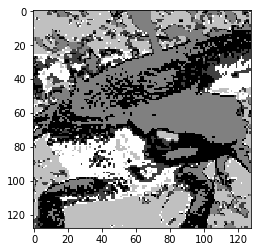

In [573]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
img_reshaped = img.reshape((H*W,C))

np.random.seed(0)
sample= img_reshaped[np.random.choice(H*W,5,replace = False)]

cls = np.zeros((H*W),dtype=np.float32)
for i in range(len(img_reshaped)):
    min_dis = 255*3 
    for j in range(len(sample)):
#         dis = np.sqrt((img_reshaped[i][0]-sample[j][0])**2+(img_reshaped[i][1]-sample[j][1])**2+(img_reshaped[i][2]-sample[j][2])**2)
        dis = np.abs(img_reshaped[i][0]-sample[j][0])+np.abs(img_reshaped[i][1]-sample[j][1])+np.abs(img_reshaped[i][2]-sample[j][2])
        if dis<min_dis:
            min_dis = dis
            cls[i]=j

cls = cls.reshape((H,W))
cls = cls*50

cls = cls.astype(np.uint8)


plt.imshow(cls,cmap="gray")
plt.show

問９２　K-meansによる減色処理 (Step.2) 減色処理

３.各インデックスに対応する色成分の平均をRGBそれぞれに対して取り、新たなクラスとする。

４.元のクラスと新しいクラスが全く同じならK-meansを終了する。そうでなければ、新しいクラスを元クラスとして2-3を繰り返す。

５.元画像の各画素で色の距離が最小となるクラスのRGBを割り当てる。

<function matplotlib.pyplot.show(*args, **kw)>

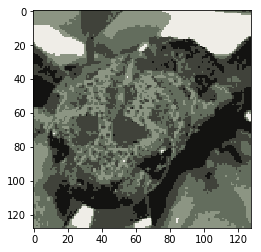

In [677]:
img = cv2.imread("madara.jpg").astype(np.float32)

H,W,C = img.shape
img_reshaped = img.reshape((H*W,C))
Class = 5
np.random.seed(0)
Cs= img_reshaped[np.random.choice(H*W,Class,replace = False)].copy()




while True:

    cls = np.zeros((H*W), dtype=int)
    
    for i in range(H*W):
        dis = np.sum(np.abs(Cs - img_reshaped[i]), axis=1)
        cls[i] = np.argmin(dis)

    tmp = np.zeros((Class, 3))
    
    for i in range(Class):
        tmp[i] = np.mean(img_reshaped[cls==i], axis=0)

    if (Cs == tmp).all():
        break
    else:
        Cs = tmp.copy()

out = np.zeros((H*W,C),dtype=np.float32)
for i in range(Class):
    out[cls==i] = Cs[i]
out[out < 0] = 0
out[out > 255] = 255
out = np.reshape(out,(H,W,3)).astype(np.uint8)
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.imshow(out)
plt.show

問９３　 機械学習の学習データの用意 (Step.1) IoUの計算

In [9]:
a = np.array((50, 50, 150, 150), dtype=np.float32)

b = np.array((60, 60, 170, 160), dtype=np.float32)

def iou(a,b):
    area_a = (a[2]-a[0])*(a[3]-a[1])
    area_b = (b[2]-b[0])*(b[3]-b[1])
    iou_x1 = np.maximum(a[0],b[0])
    iou_y1 = np.maximum(a[1],b[1])
    iou_x2 = np.minimum(a[2],b[2])
    iou_y2 = np.minimum(a[3],b[3])
    area_iou = (iou_x2-iou_x1)*(iou_y2-iou_y1)
    iou = area_iou/(area_a+area_b-area_iou)
    return iou
 
print(iou(a,b))

0.627907


問９４　機械学習の学習データの用意 (Step.2) ランダムクラッピング

<function matplotlib.pyplot.show(*args, **kw)>

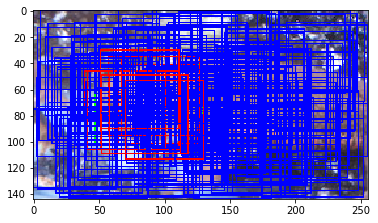

In [867]:
np.random.seed(0)
img = cv2.imread("imori_1.jpg")
H,W,C = img.shape

gt = np.array((47, 41, 129, 103), dtype=np.float32)

cv2.rectangle(img,(gt[0],gt[1]),(gt[2],gt[3]),(0,255,0),1)

Crop_num = 200
L = 60
for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1,y1,x2,y2))
    
    _iou = iou(gt,crop)
    
    if _iou >= 0.5:
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),1)
        label = 1
    else:
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)
        label = 0

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

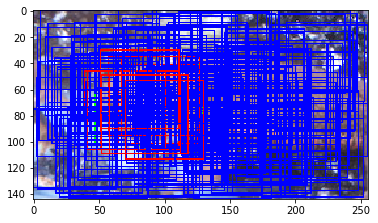

In [790]:
np.random.seed(0)

# read image
img = cv2.imread("imori_1.jpg")
H, W, C = img.shape


gt = np.array((47, 41, 129, 103), dtype=np.float32)

cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,0), 1)

# crop and create database
Crop_num = 200
L = 60

for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1, y1, x2, y2))

    _iou = iou(gt, crop)

    if _iou >= 0.5:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
        label = 1
    else:
        cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)
        label = 0
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

問９５　ニューラルネットワーク (Step.1) ディープラーニングにする

In [8]:
np.random.seed(0)

class NN:
    def __init__(self, ind=2, w=64,w2=64, outd=1, lr=0.1):
        self.w1 = np.random.normal(0, 1, [ind, w])
        self.b1 = np.random.normal(0, 1, [w])
        self.w2 = np.random.normal(0, 1, [w, w2])
        self.b2 = np.random.normal(0, 1, [w2])
        self.wout = np.random.normal(0, 1, [w2, outd])
        self.bout = np.random.normal(0, 1, [outd])
        self.lr = lr

    def forward(self, x):
        self.z1 = x
        self.z2 = sigmoid(np.dot(self.z1, self.w1) + self.b1)
        self.z3 = sigmoid(np.dot(self.z2, self.w2) + self.b2)
        self.out = sigmoid(np.dot(self.z3, self.wout) + self.bout)
        return self.out

    def train(self, x, t):
        # backpropagation output layer
        #En = t * np.log(self.out) + (1-t) * np.log(1-self.out)
        En = (self.out - t) * self.out * (1 - self.out)
        grad_wout = np.dot(self.z3.T, En)
        grad_bout = np.dot(np.ones([En.shape[0]]), En)
        self.wout -= self.lr * grad_wout
        self.bout -= self.lr * grad_bout
        # backpropagation inter layer
        grad_u2 = np.dot(En, self.wout.T) * self.z3 * (1 - self.z3)
        grad_w2 = np.dot(self.z2.T, grad_u2)
        grad_b2 = np.dot(np.ones([grad_u2.shape[0]]), grad_u2)
        self.w2 -= self.lr * grad_w2
        self.b2 -= self.lr * grad_b2
        
        grad_u1 = np.dot(grad_u2, self.w2.T) * self.z2 * (1 - self.z2)
        grad_w1 = np.dot(self.z1.T, grad_u1)
        grad_b1 = np.dot(np.ones([grad_u1.shape[0]]), grad_u1)
        self.w1 -= self.lr * grad_w1
        self.b1 -= self.lr * grad_b1

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

train_x = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
train_t = np.array([[0], [1], [1], [0]], dtype=np.float32)

nn = NN()

# train
for i in range(5000):
    nn.forward(train_x)
    nn.train(train_x, train_t)

# test
for j in range(4):
    x = train_x[j]
    t = train_t[j]
    print("in:", x, "pred:", nn.forward(x))

in: [0. 0.] pred: [0.02112243]
in: [0. 1.] pred: [0.97690913]
in: [1. 0.] pred: [0.97987911]
in: [1. 1.] pred: [0.02191621]


問９６　ニューラルネットワーク (Step.2) 学習

In [7]:
def hog(gray):
    h,w = gray.shape
    # Magnitude and gradient
    gray = np.pad(gray,(1,1),"edge")
    #輝度勾配gx,gyを求める
    gx = gray[1:h+1,2:]-gray[1:h+1,:w]
    gy = gray[2:,1:w+1]-gray[:h,1:w+1]
    gx[gx==0]=0.0000001

    #勾配強度magと勾配角度graを求める
    mag = np.sqrt(gx**2+gy**2)
    gra = np.arctan(gy/gx)
    #graの値が正になるように調節
    gra[gra<0]=np.pi+gra[gra<0]
    #graを9分割した時の値を入れるリスト作成
    gra_n = np.zeros_like((gra),dtype=np.int)
    d = np.pi/9 #最大値は180ではなく3.14で区切る

    for i in range(9):
        gra_n[np.where((gra>=i*d)&(gra<=(i+1)*d))]=i

    N = 8
    HH = h//N
    HW = w//N
    Hist = np.zeros((HH, HW, 9), dtype=np.float32)
    for y in range(HH):
        for x in range(HW):
            for j in range(N):
                for i in range(N):
                    Hist[y,x,gra_n[y*4+j,x*4+i]] += mag[y*4+j,x*4+i]
    ## Normalization

    C = 3
    eps = 1
    for y in range(HH):
        for x in range(HW):
            #for i in range(9):
            Hist[y,x]=Hist[y,x]/(np.sqrt(np.sum(Hist[max(y-1,0):min(HH,y+2),max(x-1,0):min(HW,x+2)]**2)+eps)) #なんで

    return Hist


In [909]:
np.random.seed(0)
img = cv2.imread("imori_1.jpg")
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gt = np.array((47, 41, 129, 103), dtype=np.float32)
Crop_num = 200                                                                       # データ数
L = 60                                                                               #データ１つの大きさ
H_size = 32                                                                          #切り抜いた画像をリサイズ
F_n = ((H_size//8)**2)*9   #9で割ってるのはHOG特徴量は勾配角度で9分割してるから          #リサイズした画像に対し何回HOG特徴量を抽出するか
db = np.zeros((Crop_num,F_n+1))  #各データに対して特徴量とラベルを保存する

for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1,y1,x2,y2))
    
    _iou = iou(gt,crop)
    
    if _iou >= 0.5:
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),1)
        label = 1
    else:
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)
        label = 0
        
    crop_area = gray[y1:y2,x1:x2]
    crop_area = resize(crop_area,H_size,H_size)
    _hog = hog(crop_area)
    
    db[i,:F_n] = _hog.ravel()
    db[i,-1] = label
    

In [872]:
nn = NN(ind = F_n,lr = 0.01)     #indは１つのデータに含まれる変数の数かな？今回だと特徴量の数

for i in range(10000):
    nn.forward(db[:,:F_n])
    nn.train(db[:,:F_n],db[:,-1][...,None])  #配列に縦、横って概念はないから注意！

# succeed_pred = 0
# for data in db:
#     t = data[-1]
#     prob = nn.forward(data[:F_n])
#     pred = 1 if prob>=0.5 else 0
#     if t == pred:
#         succeed_pred +=1
        
# accuracy = succeed_pred/len(db)
# print("Accuracy>>{}({}/{})".format(accuracy,succeed_pred,len(db)))

Accuracy>>1.0(200/200)


問９７　簡単な物体検出 (Step.1) スライディングウィンドウ + HOG

In [950]:
#次の問題のために前回までのデータ読み込みもやっておく
np.random.seed(0)
img = cv2.imread("imori_1.jpg")
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gt = np.array((47, 41, 129, 103), dtype=np.float32)
cv2.rectangle(img,(gt[0],gt[1]),(gt[2],gt[3]),(0,255,255),1)


array([[[119,  86,  90],
        [135, 116, 111],
        [118, 113, 110],
        ...,
        [223, 160, 169],
        [197, 152, 141],
        [213, 183, 158]],

       [[123, 112, 114],
        [126, 110, 117],
        [121, 106, 114],
        ...,
        [193, 154, 162],
        [188, 156, 150],
        [195, 168, 148]],

       [[153, 144, 130],
        [133, 116, 119],
        [114,  96, 109],
        ...,
        [188, 144, 151],
        [183, 152, 149],
        [186, 167, 152]],

       ...,

       [[243, 201, 166],
        [239, 197, 162],
        [241, 196, 162],
        ...,
        [165, 150, 178],
        [157, 141, 172],
        [148, 130, 161]],

       [[250, 208, 173],
        [251, 211, 176],
        [251, 210, 177],
        ...,
        [150, 136, 170],
        [146, 131, 163],
        [139, 124, 156]],

       [[255, 207, 174],
        [255, 212, 179],
        [255, 210, 178],
        ...,
        [147, 140, 175],
        [140, 131, 164],
        [150, 141, 174]]

In [936]:
#今回の対象画像に対して
img2 = cv2.imread("imori_many.jpg")
H2,W2,C2 = img2.shape
H_size = 32                       #ブロックのサイズ
F_n = (H_size//8)**2*9           #セルのサイズ
gray2 = 0.2126 * img2[..., 2] + 0.7152 * img2[..., 1] + 0.0722 * img2[..., 0]

recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32) #矩形の大きさ３種類

In [937]:

for y in range(0,H2,4):
    for x in range(0,W2,4):
        for rec in recs:
            dh = int(rec[0]//2)
            dw = int(rec[1]//2)
            x1 = max(0,x-dw)
            x2 = min(W2,x+dw)
            y1 = max(0,y-dh)
            y2 = min(H2,y+dh)
            region = gray2[y1:y2,x1:x2]
            region = resize(region,H_size,H_size)
            region_hog = hog(region).ravel()

In [951]:
#crop and create database
Crop_num = 200                                                                       # データ数
L = 60   
H_size = 32                       #ブロックのサイズ
F_n = (H_size//8)**2*9           #セルのサイズ
db = np.zeros((Crop_num,F_n+1))

for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1,y1,x2,y2))
    _iou = iou(gt,crop)
    
    if _iou >= 0.5:
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),1)
        label = 1
    else:
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)
        label = 0
        
    crop_area = gray[y1:y2,x1:x2]
    crop_area = resize(crop_area,H_size,H_size)
    _hog = hog(crop_area)
    
    db[i,:F_n] = _hog.ravel()
    db[i,-1] = label





問９８　簡単な物体検出 (Step.2) スライディングウィンドウ + NN

In [952]:
#train neural network
nn = NN(ind = F_n,lr = 0.01)     #indは１つのデータに含まれる変数の数かな？今回だと特徴量の数

for i in range(10000):
    nn.forward(db[:,:F_n])
    nn.train(db[:,:F_n],db[:,-1][...,None])  #配列に縦、横って概念はないから注意！




In [953]:
#今回の対象画像に対して
img2 = cv2.imread("imori_many.jpg")
H2,W2,C2 = img2.shape
# H_size = 32                       #ブロックのサイズ
# F_n = (H_size//8)**2*9           #セルのサイズ
gray2 = 0.2126 * img2[..., 2] + 0.7152 * img2[..., 1] + 0.0722 * img2[..., 0]

recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32) #矩形の大きさ３種類

detects = np.ndarray((0,5),dtype=np.float32)

#sliding window
for y in range(0,H2,4):
    for x in range(0,W2,4):
        for rec in recs:
            dh = int(rec[0]//2)
            dw = int(rec[1]//2)
            x1 = max(0,x-dw)
            x2 = min(W2,x+dw)
            y1 = max(0,y-dh)
            y2 = min(H2,y+dh)
            region = gray2[y1:y2,x1:x2]
            region = resize(region,H_size,H_size)
            region_hog = hog(region).ravel()
            
            score = nn.forward(region_hog)
            if score >=0.7:
#                 cv2.rectangle(img2,(x1,y1),(x2,y2),(0,0,255),1)
                detects = np.vstack((detects,np.array((x1,y1,x2,y2,score))))
# print(detects)
# _img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
# plt.imshow(_img2)
# plt.show

問９９　簡単な物体検出 (Step.3) Non-Maximum Suppression

In [6]:
#自作、多分どっかちがう
#Non-maximum suppression
def nms(_bboxes,iou_th=0.5,select_num=None,prob_th=None):
    bboxes = _bboxes.copy()                         #bboxは各データの値が入ってる
    bboxes[:,2] = bboxes[:,2] - bboxes[:,0]         #座標から長さ（相対位置）に変換
    bboxes[:,3] = bboxes[:,3] - bboxes[:,1]
    
    # sort by bbox's score
    sort_inds = np.argsort(bboxes[:,-1])[::-1]      #残ったbboxをソートしたやつのインデックス、[::-1]は逆転させるって意味
    processed_bbox_ind =[]                               #処理済みのbboxを格納
    return_inds=[]                                  #最終的に残ったbboxを格納
    unselected_inds = sort_inds.copy()              #未処理のbboxのインデックス
    
    while len(unselected_inds)>0:
        process_bboxes = bboxes[unselected_inds]                            #未処理のbbox
        argmax_score_ind = np.argmax(process_bboxes[::,-1])                 #未処理のなかでもっとも値が大きいやつのインデックス                 
        max_score_ind = unselected_inds[argmax_score_ind]                  #↑のunselected_indsの中でのインデックス
        return_inds += [max_score_ind]                                       #答えに加える
        unselected_inds = np.delete(unselected_inds,argmax_score_ind)      #処理済みの一つ(手本)を削除
        
        base_bbox = bboxes[max_score_ind]                                  #お手本のモデル
        compare_bboxes = bboxes[unselected_inds]                             #比較対象に未処理boxのを持ってくる
        
        base_x1 = base_bbox[0]                                             #画面外にはみ出ないようにお手本を作成
        base_y1 = base_bbox[1]
        base_x2 = base_bbox[2]+base_x1
        base_y2 = base_bbox[3]+base_y1
        
        base_w = np.maximum(base_bbox[2],0)
        base_h = np.maximum(base_bbox[3],0)
        base_area = base_w*base_h                                          
        
        #compute iou_area between base bbox andother bboxes                        ここから下は複数の対象に対して同時並行で処理する
        iou_x1 = np.maximum(base_x1,compare_bboxes[:,0])                      #被ってるエリアの面積導出
        iou_y1 = np.maximum(base_y1,compare_bboxes[:,1])
        iou_x2 = np.minimum(base_x2,compare_bboxes[:,2]+compare_bboxes[:,0])
        iou_y2 = np.minimum(base_y2,compare_bboxes[:,3]+compare_bboxes[:,1])
        
        iou_w = np.maximum(iou_x2-iou_x1,0)
        iou_h = np.maximum(iou_y2-iou_y1,0)
        iou_area = iou_w*iou_h
        
        compare_w = np.maximum(compare_bboxes[:,2],0)
        compare_h = np.maximum(compare_bboxes[:,3],0)
        compare_area = compare_w * compare_h
        
        #bbox's index which iou ratio over threshold is excluded
        all_area = compare_area + base_area - iou_area                      #全エリアの総面積導出
        iou_ratio = np.zeros((len(unselected_inds)))                         #iou_ratioの格納リスト作成　　　　　　　　　　　　　　
        iou_ratio[all_area<0.9] = 0.                                         #総面積0.9以下の場合は無視する
        _ind = all_area >= 0.9
        iou_ratio[_ind]=iou_area[_ind]/all_area[_ind]                        #iou_ratioの計算と値の格納
        
        unselected_inds = np.delete(unselected_inds,np.where(iou_ratio >= iou_th)[0])  #iou_ratioが規定値より大きかったものを削除
        
    if prob_th is not None:
        preds = bboxes[return_inds][:,-1]
        return_inds = np.array(return_inds)[np.where(preds>=prob_th)[0]].tolist()
            
        #pick bbox's index by defined number with higher score
    if select_num is not None:
        return_inds = return_inds[:select_num]
            
    return return_inds

<function matplotlib.pyplot.show(*args, **kw)>

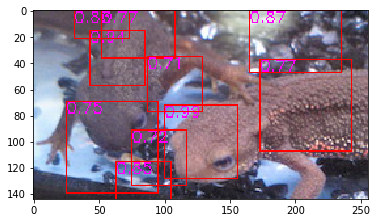

In [1015]:
np.random.seed(0)
img = cv2.imread("imori_1.jpg")
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gt = np.array((47, 41, 129, 103), dtype=np.float32)
cv2.rectangle(img,(gt[0],gt[1]),(gt[2],gt[3]),(0,255,255),1)

#Crop_num個の学習データとそのHOG特徴量の抽出
Crop_num = 200                                                                       # データ数
L = 60   
H_size = 32                       #ブロックのサイズ
F_n = (H_size//8)**2*9           #セルのサイズ→特徴量は１セルごとに９つずつ
db = np.zeros((Crop_num,F_n+1))
for i in range(Crop_num):         #L×LのデータをCrop_num個取り出す
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1,y1,x2,y2))
    _iou = iou(gt,crop)          #各データと顔部分のお手本データの重なる範囲(=_iou)
    
    if _iou >= 0.5:
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),1)
        label = 1                                        #_iouが0.5以上のデータは赤枠で囲む
    else:
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)
        label = 0                                        #_iouが0.5未満のデータは青枠で囲む
        
    crop_area = gray[y1:y2,x1:x2]
    crop_area = resize(crop_area,H_size,H_size)          #データをリサイズする
    _hog = hog(crop_area)                                #データのHOG特徴量を求める
    
    db[i,:F_n] = _hog.ravel()                            #HOG特徴量を一列にしたものをデータベースに追加
    db[i,-1] = label
    
    
    
#train neural network
nn = NN(ind = F_n,lr = 0.01)     #indは１つのデータに含まれる変数の数かな？今回だと特徴量の数

for i in range(10000):
    nn.forward(db[:,:F_n])
    nn.train(db[:,:F_n],db[:,-1][...,None])  #配列に縦、横って概念はないから注意！擬似的に縦配列にするには次元追加
    
    
    

#今回の対象画像に対して
img2 = cv2.imread("imori_many.jpg")
H2,W2,C2 = img2.shape
gray2 = 0.2126 * img2[..., 2] + 0.7152 * img2[..., 1] + 0.0722 * img2[..., 0]

recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32) #矩形の大きさ３種類

detects = np.ndarray((0,5),dtype=np.float32)

#sliding window
for y in range(0,H2,4):                                #画像全体(の要素要素)に対し
    for x in range(0,W2,4):
        for rec in recs:                               #１種類の矩形ずつ
            dh = int(rec[0]//2)
            dw = int(rec[1]//2)                       #モデルを作り
            x1 = max(0,x-dw)                           #画像の各要素からモデルの矩形を作り
            x2 = min(W2,x+dw)
            y1 = max(0,y-dh)
            y2 = min(H2,y+dh)
            region = gray2[y1:y2,x1:x2]
            region = resize(region,H_size,H_size)     #求めるサイズにリサイズして
            region_hog = hog(region).ravel()         #そのHOG特徴量を求める
            
            score = nn.forward(region_hog)           #HOG特徴量からlabel値を予測する
            if score >=0.7:
                detects = np.vstack((detects,np.array((x1,y1,x2,y2,score))))  #配列の追加（axis=0の方向）
detects = detects[nms(detects, iou_th=0.25)]        #他の画像と25%以上かぶっている要素をdetectsから削除
for d in detects:
    v = list(map(int,d[:4]))
    cv2.rectangle(img2,(v[0],v[1]),(v[2],v[3]),(0,0,255),1)
    cv2.putText(img2,"{:.2f}".format(d[-1]),(v[0],v[1]+9),cv2.FONT_HERSHEY_SIMPLEX,0.4,(255,0,255),1)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show

問１００　簡単な物体検出 (Step.4) 評価 Precision, Recall, F-score, mAP

In [1017]:
#Recall,Precision,F-score
GT = np.array(((27, 48, 95, 110), (101, 75, 171, 138)), dtype=np.float32) #ground truth 
iou_th = 0.5

Rs = np.zeros((len(GT)))
Ps = np.zeros((len(detects)))

for i, g in enumerate(GT):
    iou_x1 = np.maximum(g[0], detects[:, 0])
    iou_y1 = np.maximum(g[1], detects[:, 1])
    iou_x2 = np.minimum(g[2], detects[:, 2])
    iou_y2 = np.minimum(g[3], detects[:, 3])
    iou_w = np.maximum(0, iou_x2 - iou_x1)
    iou_h = np.maximum(0, iou_y2 - iou_y1)
    iou_area = iou_w * iou_h
    g_area = (g[2] - g[0]) * (g[3] - g[1])
    d_area = (detects[:, 2] - detects[:, 0]) * (detects[:, 3] - detects[:, 1])
    ious = iou_area / (g_area + d_area - iou_area)
    
    Rs[i] = 1 if len(np.where(ious >= iou_th)[0]) > 0 else 0
    Ps[ious >= iou_th]=1
    
R = np.sum(Rs)/len(Rs)
P = np.sum(Ps)/len(Ps)
F = 2*R*P/(R+P)

print("Recall :",R )
print("Precision : ",P)
print("F-score : ",F)



Recall : 0.5
Precision :  0.1
F-score :  0.16666666666666669


In [1018]:
#mAP
mAP = 0 
for i in range(len(detects)):
    mAP += np.sum(Ps[:i])/(i+1)*Ps[i]
mAP /= np.sum(Ps)

print("mAP : ",mAP)
    

mAP :  0.0


In [33]:
np.random.seed(6)
img = cv2.imread("imori_1.jpg")
H,W,C = img.shape
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
gt = np.array((47, 41, 129, 103), dtype=np.float32)
cv2.rectangle(img,(gt[0],gt[1]),(gt[2],gt[3]),(0,255,255),1)

#Crop_num個の学習データとそのHOG特徴量の抽出
Crop_num = 1000                                                                       # データ数
L = 60   
H_size = 32                       #ブロックのサイズ
F_n = (H_size//8)**2*9           #セルのサイズ→特徴量は１セルごとに９つずつ
db = np.zeros((Crop_num,F_n+1))
for i in range(Crop_num):         #L×LのデータをCrop_num個取り出す
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1,y1,x2,y2))
    _iou = iou(gt,crop)          #各データと顔部分のお手本データの重なる範囲(=_iou)
    
    if _iou >= 0.5:
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),1)
        label = 1                                        #_iouが0.5以上のデータは赤枠で囲む
    else:
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),1)
        label = 0                                        #_iouが0.5未満のデータは青枠で囲む
        
    crop_area = gray[y1:y2,x1:x2]
    crop_area = resize(crop_area,H_size,H_size)          #データをリサイズする
    _hog = hog(crop_area)                                #データのHOG特徴量を求める
    
    db[i,:F_n] = _hog.ravel()                            #HOG特徴量を一列にしたものをデータベースに追加
    db[i,-1] = label
    
    
    
#train neural network
nn = NN(ind = F_n,lr = 0.01)     #indは１つのデータに含まれる変数の数かな？今回だと特徴量の数

for i in range(30000):
    nn.forward(db[:,:F_n])
    nn.train(db[:,:F_n],db[:,-1][...,None])  #配列に縦、横って概念はないから注意！擬似的に縦配列にするには次元追加
    
    
    

#今回の対象画像に対して
img2 = cv2.imread("imori_many.jpg")
H2,W2,C2 = img2.shape
gray2 = 0.2126 * img2[..., 2] + 0.7152 * img2[..., 1] + 0.0722 * img2[..., 0]

recs = np.array(((42, 42), (56, 56), (70, 70)), dtype=np.float32) #矩形の大きさ３種類

detects = np.ndarray((0,5),dtype=np.float32)

#sliding window
for y in range(0,H2,4):                                #画像全体(の要素要素)に対し
    for x in range(0,W2,4):
        for rec in recs:                               #１種類の矩形ずつ
            dh = int(rec[0]//2)
            dw = int(rec[1]//2)                       #モデルを作り
            x1 = max(0,x-dw)                           #画像の各要素からモデルの矩形を作り
            x2 = min(W2,x+dw)
            y1 = max(0,y-dh)
            y2 = min(H2,y+dh)
            region = gray2[y1:y2,x1:x2]
            region = resize(region,H_size,H_size)     #求めるサイズにリサイズして
            region_hog = hog(region).ravel()         #そのHOG特徴量を求める
            
            score = nn.forward(region_hog)           #HOG特徴量からlabel値を予測する
            if score >=0.7:
                detects = np.vstack((detects,np.array((x1,y1,x2,y2,score))))  #配列の追加（axis=0の方向）
detects = detects[nms(detects, iou_th=0.25)]        #他の画像と25%以上かぶっている要素をdetectsから削除

Recall : 0.5
Precision :  0.07692307692307693
F-score :  0.13333333333333336
mAP :  0.0


<function matplotlib.pyplot.show(*args, **kw)>

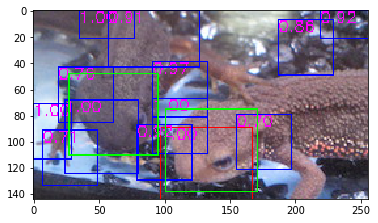

In [34]:
#Recall,Precision,F-score
GT = np.array(((27, 48, 95, 110), (101, 75, 171, 138)), dtype=np.float32) #ground truth 
iou_th = 0.5

Rs = np.zeros((len(GT)))
Ps = np.zeros((len(detects)))

for i, g in enumerate(GT):
    iou_x1 = np.maximum(g[0], detects[:, 0])
    iou_y1 = np.maximum(g[1], detects[:, 1])
    iou_x2 = np.minimum(g[2], detects[:, 2])
    iou_y2 = np.minimum(g[3], detects[:, 3])
    iou_w = np.maximum(0, iou_x2 - iou_x1)
    iou_h = np.maximum(0, iou_y2 - iou_y1)
    iou_area = iou_w * iou_h
    g_area = (g[2] - g[0]) * (g[3] - g[1])
    d_area = (detects[:, 2] - detects[:, 0]) * (detects[:, 3] - detects[:, 1])
    ious = iou_area / (g_area + d_area - iou_area)
    
    Rs[i] = 1 if len(np.where(ious >= iou_th)[0]) > 0 else 0
    Ps[ious >= iou_th]=1
    
R = np.sum(Rs)/len(Rs)
P = np.sum(Ps)/len(Ps)
F = 2*R*P/(R+P)

print("Recall :",R )
print("Precision : ",P)
print("F-score : ",F)
#mAP
mAP = 0 
for i in range(len(detects)):
    mAP += np.sum(Ps[:i])/(i+1)*Ps[i]
mAP /= np.sum(Ps)

print("mAP : ",mAP)

#Display
for i in range(len(detects)):
    v = list(map(int,detects[i,:4]))
    if Ps[i]==1:
        cv2.rectangle(img2,(v[0],v[1]),(v[2],v[3]),(0,0,255),1)
    else:
        cv2.rectangle(img2,(v[0],v[1]),(v[2],v[3]),(255,0,0),1)
    cv2.putText(img2,"{:.2f}".format(detects[i, -1]),(v[0],v[1]+9),cv2.FONT_HERSHEY_SIMPLEX,0.4,(255,0,255),1)

for g in GT:
    cv2.rectangle(img2,(g[0],g[1]),(g[2],g[3]),(0,255,0),1)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show
    